In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt

In [4]:

data=pd.read_csv('3D_spatial_network.txt')

In [5]:
data.head()

,144552912,9.3498486,56.7408757,17.0527715677876
0,144552912,9.350188,56.740679,17.614840
1,144552912,9.350549,56.740544,18.083536
2,144552912,9.350806,56.740484,18.279465
3,144552912,9.351053,56.740486,18.422974
4,144552912,9.351475,56.740502,19.124889


In [6]:
data.columns=['Drop','Latitude','Longitude','Altitude']

In [7]:
data.drop('Drop', axis=1, inplace=True)

In [8]:
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)


In [9]:
data['Latitude']=(data['Latitude']-data['Latitude'].mean())/data['Latitude'].std()
data['Longitude']=(data['Longitude']-data['Longitude'].mean())/data['Longitude'].std()
data['Altitude']=(data['Altitude']-data['Altitude'].mean())/data['Altitude'].std()
data.head()

,Latitude,Longitude,Altitude
0,-0.609439,-1.167475,-0.258290
1,-0.608854,-1.167938,-0.233452
2,-0.608436,-1.168145,-0.223068
3,-0.608035,-1.168139,-0.215463
4,-0.607351,-1.168084,-0.178266


In [10]:
X1=[]
X1= data['Latitude'].iloc[:]
X2=[]
X2= data['Longitude'].iloc[:]
Y=[]
Y= data['Altitude'].iloc[:]


In [11]:
X1_train, X1_test, X2_train, X2_test, Y_train, Y_test= train_test_split(X1, X2, Y, test_size= 0.3)

In [12]:
X1_train.size

182809

In [13]:
X1_test.size

78347

In [79]:
# degree 1
def lin_1(x1, x2, y, w0_curr=0, w1_curr=0, w2_curr=0, learning=0.01,count=0):
    N=float(len(y))
    avg= sum(y)/len(Y)
    a1=[]
    b1=[]
    W1=[]
    W2=[]
    for i in range(1000):
        y_curr= w0_curr+w1_curr*x1+w2_curr*x2
        sse=sum([data**2
                 for data in (y-y_curr)])/N
        ssr=sum([data**2 
               for data in (y_curr-avg)])/N
       
        D_w0=(-2/N)*sum(y-y_curr)
        D_w1=(-2/N)*sum(x1*(y-y_curr))
        D_w2=(-2/N)*sum(x2*(y-y_curr))
        w0_curr=w0_curr-(learning*D_w0)
        w1_curr=w1_curr-(learning*D_w1)
        w2_curr=w2_curr-(learning*D_w2)
        a1.append(sse)
        b1.append(count)
        W1.append(w1_curr)
        W2.append(w2_curr)
        count=count+1
    
    return (sse/(sse+ssr)),math.sqrt(sse)

In [75]:
rr2,rmse1=lin_1(X1_train,X2_train,Y_train)

In [76]:
rr2

0.9719991354828943

In [77]:
rmse1

0.9867580843311743

In [65]:
RR2,

0.027242107237956108

In [70]:
wt1[999]

0.17106542352121187

In [71]:
wt2[999]

-0.18545447499149678

Text(0.5, 1.0, 'Cost Function vs Iterations in degree 1 (Train Data)')

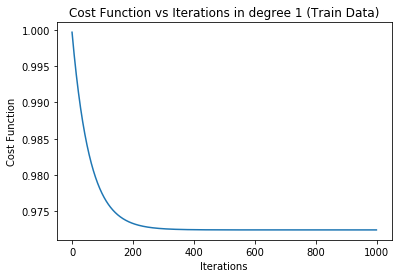

In [31]:
plt.plot(iter1, cost1)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Iterations in degree 1 (Train Data)")

Text(0.5, 0, 'cost funct')

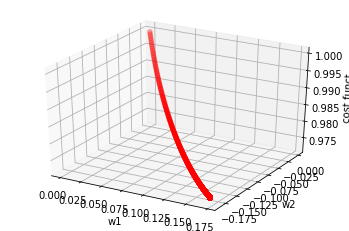

In [73]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111, projection= '3d')
ax.scatter(wt1,wt2, cost1, c='r',marker='o')
ax.set_xlabel("w1")
ax.set_ylabel("w2")
ax.set_zlabel("cost funct")


In [80]:
rsq1,Rmse1=lin_1(X1_test,X2_test,Y_test)

In [81]:
rsq1

0.9739153904318711

In [82]:
Rmse1

0.9848391404603095

In [76]:
rsq1

0.027868035858992543

In [77]:
WT1[999]

0.16921192946792094

In [78]:
WT2[999]

-0.19127855120701934

Text(0.5, 0, 'cost funct')

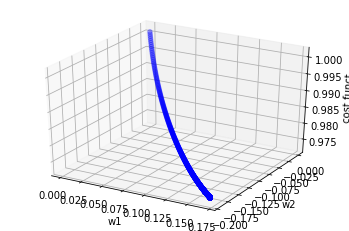

In [79]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111, projection= '3d')
ax.scatter(WT1,WT2, Cost1, c='b',marker='o')
ax.set_xlabel("w1")
ax.set_ylabel("w2")
ax.set_zlabel("cost funct")


In [65]:
# degree 2
def lin_2(x1, x2, y, w0_curr=0, w1_curr=0, w2_curr=0, w3_curr=0,w4_curr=0,w5_curr=0, learning=0.01,count=0):
    N=float(len(y))
    avg= sum(y)/len(Y)
    x3=x1*x1
    x4=x2*x2
    x5=x1*x2
   
    for i in range(1000):
        
        y_curr= w0_curr+w1_curr*x1+w2_curr*x2+w3_curr*x3+w4_curr*x4+w5_curr*x5
        sse=sum([data**2
                 for data in (y-y_curr)])/N
        ssr=sum([data**2 
               for data in (y_curr-avg)])/N
       
        D_w0=(-1/N)*sum(y-y_curr)
        D_w1=(-1/N)*sum(x1*(y-y_curr))
        D_w2=(-1/N)*sum(x2*(y-y_curr))
        D_w3=(-1/N)*sum(x3*(y-y_curr))
        D_w4=(-1/N)*sum(x4*(y-y_curr))
        D_w5=(-1/N)*sum(x5*(y-y_curr))
        w0_curr=w0_curr-(learning*D_w0)
        w1_curr=w1_curr-(learning*D_w1)
        w2_curr=w2_curr-(learning*D_w2)
        w3_curr=w3_curr-(learning*D_w3)
        w4_curr=w4_curr-(learning*D_w4)
        w5_curr=w5_curr-(learning*D_w5)
        
       
    return sse/(sse+ssr),math.sqrt(sse)

In [67]:
r2,rmse2 =  lin_2(X1_train, X2_train, Y_train)

In [68]:
r2

0.9540224952501906

In [69]:
rmse2

0.9774241545788475

Text(0.5, 1.0, 'Cost function using Gradient Descent')

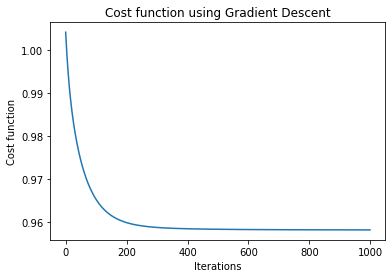

In [53]:
plt.plot(count2,cost2)
plt.xlabel("Iterations")
plt.ylabel("Cost function")
plt.title("Cost function using Gradient Descent")

Text(0.5, 1.0, 'Root Mean Square Error using Gradient Descent for degree 2')

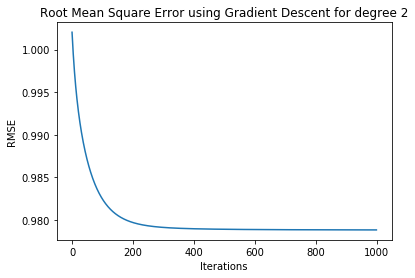

In [54]:
plt.plot(count2,rms)
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.title("Root Mean Square Error using Gradient Descent for degree 2")

Text(0.5, 1.0, 'R square using Gradient Descent for degree 2')

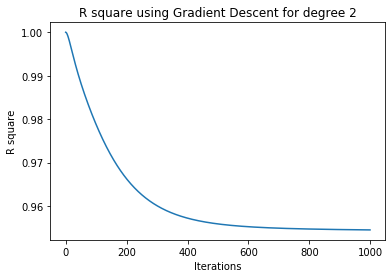

In [55]:
plt.plot(count2, rsqu)
plt.xlabel("Iterations")
plt.ylabel("R square")
plt.title("R square using Gradient Descent for degree 2")

In [70]:
rsq2,Rmse2=lin_2(X1_test,X2_test,Y_test)

In [71]:
Rmse2

0.9755722801724312

In [72]:
rsq2

0.9559879105508419

In [83]:
# degree 3

def lin_3(x1, x2, y, w0_curr=0, w1_curr=0, w2_curr=0, w3_curr=0,w4_curr=0,w5_curr=0, w6_curr=0, w7_curr=0, w8_curr=0, w9_curr=0, learning=0.01,count=0):
    N= len(y)
    avg= sum(y)/len(Y)
    x3=x1*x1
    x4=x2*x2
    x5=x1*x2
    x6=x1*x1*x2
    x7=x2*x2*x1
    x8=x1*x1*x1
    x9=x2*x2*x2
   
    for i in range(1000):
        y_curr= w0_curr+w1_curr*x1+w2_curr*x2+w3_curr*x3+w4_curr*x4+w5_curr*x5+w6_curr*x6+w7_curr*x7+w8_curr*x8+w9_curr*x9
        sse=sum([data**2
                 for data in (y-y_curr)])/N
        ssr=sum([data**2 
               for data in (y_curr-avg)])/N
        D_w0=(-2/N)*sum(y-y_curr)
        D_w1=(-2/N)*sum(x1*(y-y_curr))
        D_w2=(-2/N)*sum(x2*(y-y_curr))
        D_w3=(-2/N)*sum(x3*(y-y_curr))
        D_w4=(-2/N)*sum(x4*(y-y_curr))
        D_w5=(-2/N)*sum(x5*(y-y_curr))
        D_w6=(-2/N)*sum(x6*(y-y_curr))
        D_w7=(-2/N)*sum(x7*(y-y_curr))
        D_w8=(-2/N)*sum(x8*(y-y_curr))
        D_w9=(-2/N)*sum(x9*(y-y_curr))
        w0_curr=w0_curr-(learning*D_w0)
        w1_curr=w1_curr-(learning*D_w1)
        w2_curr=w2_curr-(learning*D_w2)
        w3_curr=w3_curr-(learning*D_w3)
        w4_curr=w4_curr-(learning*D_w4)
        w5_curr=w5_curr-(learning*D_w5)
        w6_curr=w6_curr-(learning*D_w6)
        w7_curr=w7_curr-(learning*D_w7)
        w8_curr=w8_curr-(learning*D_w8)
        w9_curr=w9_curr-(learning*D_w9)
       
    return sse/(sse+ssr), math.sqrt(sse)

In [84]:
rsq,rmse3= lin_3(X1_train,X2_train, Y_train )

In [85]:
rmse3

0.9274760301927376

In [86]:
rsq

0.8715381841688764

In [87]:
rsq3,Rmse3=lin_3(X1_test,X2_test,Y_test)

In [88]:
Rmse3

0.9255518949403609

In [89]:
rsq3

0.8723195435090235

In [15]:
# degree 4


def lin_4(x1, x2, y, w0_curr=0, w1_curr=0, w2_curr=0, w3_curr=0,w4_curr=0,w5_curr=0, w6_curr=0, w7_curr=0, w8_curr=0, w9_curr=0,w10_curr=0,w11_curr=0,w12_curr=0,w13_curr=0,w14_curr=0,learning=0.01):
    N= len(y)
    avg= sum(y)/len(Y)
    x3=x1*x1
    x4=x2*x2
    x5=x1*x2
    x6=x1*x1*x2
    x7=x2*x2*x1
    x8=x1*x1*x1
    x9=x2*x2*x2
    x10=x4*x4
    x11= x6*x1
    x12= x7*x2
    x13= x8*x1
    x14= x9*x2
    
    for i in range(1000):
        y_curr= w0_curr+w1_curr*x1+w2_curr*x2+w3_curr*x3+w4_curr*x4+w5_curr*x5+w6_curr*x6+w7_curr*x7+w8_curr*x8+w9_curr*x9+w10_curr*x10+w11_curr*x11+w12_curr*x12+w13_curr*x13+w14_curr*x14
        sse=sum([data**2
                 for data in (y-y_curr)])/N
        ssr=sum([data**2 
               for data in (y_curr-avg)])/N
        D_w0=(-2/N)*sum(y-y_curr)
        D_w1=(-2/N)*sum(x1*(y-y_curr))
        D_w2=(-2/N)*sum(x2*(y-y_curr))
        D_w3=(-2/N)*sum(x3*(y-y_curr))
        D_w4=(-2/N)*sum(x4*(y-y_curr))
        D_w5=(-2/N)*sum(x5*(y-y_curr))
        D_w6=(-2/N)*sum(x6*(y-y_curr))
        D_w7=(-2/N)*sum(x7*(y-y_curr))
        D_w8=(-2/N)*sum(x8*(y-y_curr))
        D_w9=(-2/N)*sum(x9*(y-y_curr))
        D_w10=(-2/N)*sum(x10*(y-y_curr))
        D_w11=(-2/N)*sum(x11*(y-y_curr))
        D_w12=(-2/N)*sum(x12*(y-y_curr))
        D_w13=(-2/N)*sum(x13*(y-y_curr))
        D_w14=(-2/N)*sum(x14*(y-y_curr))
        w0_curr=w0_curr-(learning*D_w0)
        w1_curr=w1_curr-(learning*D_w1)
        w2_curr=w2_curr-(learning*D_w2)
        w3_curr=w3_curr-(learning*D_w3)
        w4_curr=w4_curr-(learning*D_w4)
        w5_curr=w5_curr-(learning*D_w5)
        w6_curr=w6_curr-(learning*D_w6)
        w7_curr=w7_curr-(learning*D_w7)
        w8_curr=w8_curr-(learning*D_w8)
        w9_curr=w9_curr-(learning*D_w9)
        w10_curr=w10_curr-(learning*D_w10)
        w11_curr=w11_curr-(learning*D_w11)
        w12_curr=w12_curr-(learning*D_w12)
        w13_curr=w13_curr-(learning*D_w13)
        w14_curr=w14_curr-(learning*D_w14)
    return sse/(sse+ssr), math.sqrt(sse)

In [16]:
RR,rmse4=lin_4(X1_train,X2_train,Y_train)

In [17]:
rmse4

0.903374202796777

In [18]:
RR

0.8375768092839748

In [19]:
rsq4,Rmse4=lin_4(X1_test,X2_test,Y_test)

In [20]:
Rmse4

0.9009178451134674

In [21]:
rsq4

0.8376647554405061

In [28]:
data.head()

,Latitude,Longitude,Altitude
0,-0.609439,-1.167475,-0.258290
1,-0.608854,-1.167938,-0.233452
2,-0.608436,-1.168145,-0.223068
3,-0.608035,-1.168139,-0.215463
4,-0.607351,-1.168084,-0.178266


In [37]:
# degree 5

def lin_5(x1, x2, y, w0_curr=0, w1_curr=0, w2_curr=0, w3_curr=0,w4_curr=0,w5_curr=0, w6_curr=0, w7_curr=0, w8_curr=0, w9_curr=0,w10_curr=0,w11_curr=0,w12_curr=0,w13_curr=0,w14_curr=0,w15_curr=0,w16_curr=0,w17_curr=0,w18_curr=0,w19_curr=0,w20_curr=0,learning=0.001):
    N= len(y)
    avg= sum(y)/len(Y)
    x3=x1*x1
    x4=x2*x2
    x5=x1*x2
    x6=x1*x1*x2
    x7=x2*x2*x1
    x8=x1*x1*x1
    x9=x2*x2*x2
    x10=x4*x4
    x11= x6*x1
    x12= x7*x2
    x13= x8*x1
    x14= x9*x2
    x15= x8*x4
    x16= x9*x3
    x17= x13*x2
    x18= x14*x1
    x19= x13*x1
    x20= x14*x2
    
    for i in range(1000):
        y_curr= w0_curr+w1_curr*x1+w2_curr*x2+w3_curr*x3+w4_curr*x4+w5_curr*x5+w6_curr*x6+w7_curr*x7+w8_curr*x8+w9_curr*x9+w10_curr*x10+w11_curr*x11+w12_curr*x12+w13_curr*x13+w14_curr*x14+w15_curr*x15+w16_curr*x16+w17_curr*x17+w18_curr*x18+w19_curr*x19+w20_curr*x20
        sse=sum([data**2
                 for data in (y-y_curr)])/N
        
        ssr=sum([data**2 
               for data in (y_curr-avg)])/N
        D_w0=(-2/N)*sum(y-y_curr)
        D_w1=(-2/N)*sum(x1*(y-y_curr))
        D_w2=(-2/N)*sum(x2*(y-y_curr))
        D_w3=(-2/N)*sum(x3*(y-y_curr))
        D_w4=(-2/N)*sum(x4*(y-y_curr))
        D_w5=(-2/N)*sum(x5*(y-y_curr))
        D_w6=(-2/N)*sum(x6*(y-y_curr))
        D_w7=(-2/N)*sum(x7*(y-y_curr))
        D_w8=(-2/N)*sum(x8*(y-y_curr))
        D_w9=(-2/N)*sum(x9*(y-y_curr))
        D_w10=(-2/N)*sum(x10*(y-y_curr))
        D_w11=(-2/N)*sum(x11*(y-y_curr))
        D_w12=(-2/N)*sum(x12*(y-y_curr))
        D_w13=(-2/N)*sum(x13*(y-y_curr))
        D_w14=(-2/N)*sum(x14*(y-y_curr))
        D_w15=(-2/N)*sum(x15*(y-y_curr))
        D_w16=(-2/N)*sum(x16*(y-y_curr))
        D_w17=(-2/N)*sum(x17*(y-y_curr))
        D_w18=(-2/N)*sum(x18*(y-y_curr))
        D_w19=(-2/N)*sum(x19*(y-y_curr))
        D_w20=(-2/N)*sum(x20*(y-y_curr))
                
        w0_curr=w0_curr-(learning*D_w0)
        w1_curr=w1_curr-(learning*D_w1)
        w2_curr=w2_curr-(learning*D_w2)
        w3_curr=w3_curr-(learning*D_w3)
        w4_curr=w4_curr-(learning*D_w4)
        w5_curr=w5_curr-(learning*D_w5)
        w6_curr=w6_curr-(learning*D_w6)
        w7_curr=w7_curr-(learning*D_w7)
        w8_curr=w8_curr-(learning*D_w8)
        w9_curr=w9_curr-(learning*D_w9)
        w10_curr=w10_curr-(learning*D_w10)
        w11_curr=w11_curr-(learning*D_w11)
        w12_curr=w12_curr-(learning*D_w12)
        w13_curr=w13_curr-(learning*D_w13)
        w14_curr=w14_curr-(learning*D_w14)
        w15_curr=w15_curr-(learning*D_w15)
        w16_curr=w16_curr-(learning*D_w16)
        w17_curr=w17_curr-(learning*D_w17)
        w18_curr=w18_curr-(learning*D_w18)
        w19_curr=w19_curr-(learning*D_w19)
        w20_curr=w20_curr-(learning*D_w20)
            
        
    return sse/(sse+ssr),math.sqrt(sse)

In [38]:
aa,rmse5=lin_5(X1_train, X2_train, Y_train)

In [39]:
rmse5

0.941543475755632

In [40]:
aa

0.9176306563083754

In [41]:
rsq5,Rmse5=lin_5(X1_test,X2_test,Y_test)

In [42]:
Rmse5

0.939093603803497

In [43]:
rsq5

0.9186104101561249

In [52]:
# degree 6

def lin_6(x1, x2, y, w0_curr=0, w1_curr=0, w2_curr=0, w3_curr=0,w4_curr=0,w5_curr=0, w6_curr=0, w7_curr=0, w8_curr=0, w9_curr=0,w10_curr=0,w11_curr=0,w12_curr=0,w13_curr=0,w14_curr=0,w15_curr=0,w16_curr=0,w17_curr=0,w18_curr=0,w19_curr=0,w20_curr=0,w21_curr=0,w22_curr=0,w23_curr=0,w24_curr=0,w25_curr=0,w26_curr=0,w27_curr=0,learning=0.0001):
    N= len(y)
    avg= sum(y)/len(Y)
    x3= x1*x1
    x4= x2*x2
    x5= x1*x2
    x6= x1*x1*x2
    x7= x2*x2*x1
    x8= x1*x1*x1
    x9= x2*x2*x2
    x10= x4*x4
    x11= x6*x1
    x12= x7*x2
    x13= x8*x1
    x14= x9*x2
    x15= x8*x4
    x16= x9*x3
    x17= x13*x2
    x18= x14*x1
    x19= x13*x1
    x20= x14*x2
    x21= x8*x9
    x22= x13*x4
    x23= x14*x3
    x24= x19*x2
    x25= x20*x1
    x26= x19*x1
    x27= x20*x2
    
    for i in range(1000):
        y_curr= w0_curr+w1_curr*x1+w2_curr*x2+w3_curr*x3+w4_curr*x4+w5_curr*x5+w6_curr*x6+w7_curr*x7+w8_curr*x8+w9_curr*x9+w10_curr*x10+w11_curr*x11+w12_curr*x12+w13_curr*x13+w14_curr*x14+w15_curr*x15+w16_curr*x16+w17_curr*x17+w18_curr*x18+w19_curr*x19+w20_curr*x20+w21_curr*x21+w22_curr*x22+w23_curr*x23+w24_curr*x24+w25_curr*x25+w26_curr*x26+w27_curr*x27
        sse=sum([data**2
                 for data in (y-y_curr)])/N
        ssr=sum([data**2 
               for data in (y_curr-avg)])/N
        D_w0=(-2/N)*sum(y-y_curr)
        D_w1=(-2/N)*sum(x1*(y-y_curr))
        D_w2=(-2/N)*sum(x2*(y-y_curr))
        D_w3=(-2/N)*sum(x3*(y-y_curr))
        D_w4=(-2/N)*sum(x4*(y-y_curr))
        D_w5=(-2/N)*sum(x5*(y-y_curr))
        D_w6=(-2/N)*sum(x6*(y-y_curr))
        D_w7=(-2/N)*sum(x7*(y-y_curr))
        D_w8=(-2/N)*sum(x8*(y-y_curr))
        D_w9=(-2/N)*sum(x9*(y-y_curr))
        D_w10=(-2/N)*sum(x10*(y-y_curr))
        D_w11=(-2/N)*sum(x11*(y-y_curr))
        D_w12=(-2/N)*sum(x12*(y-y_curr))
        D_w13=(-2/N)*sum(x13*(y-y_curr))
        D_w14=(-2/N)*sum(x14*(y-y_curr))
        D_w15=(-2/N)*sum(x15*(y-y_curr))
        D_w16=(-2/N)*sum(x16*(y-y_curr))
        D_w17=(-2/N)*sum(x17*(y-y_curr))
        D_w18=(-2/N)*sum(x18*(y-y_curr))
        D_w19=(-2/N)*sum(x19*(y-y_curr))
        D_w20=(-2/N)*sum(x20*(y-y_curr))
        D_w21=(-2/N)*sum(x21*(y-y_curr))
        D_w22=(-2/N)*sum(x22*(y-y_curr))
        D_w23=(-2/N)*sum(x23*(y-y_curr))
        D_w24=(-2/N)*sum(x24*(y-y_curr))
        D_w25=(-2/N)*sum(x25*(y-y_curr))
        D_w26=(-2/N)*sum(x26*(y-y_curr))
        D_w27=(-2/N)*sum(x27*(y-y_curr))
        
                
        w0_curr=w0_curr-(learning*D_w0)
        w1_curr=w1_curr-(learning*D_w1)
        w2_curr=w2_curr-(learning*D_w2)
        w3_curr=w3_curr-(learning*D_w3)
        w4_curr=w4_curr-(learning*D_w4)
        w5_curr=w5_curr-(learning*D_w5)
        w6_curr=w6_curr-(learning*D_w6)
        w7_curr=w7_curr-(learning*D_w7)
        w8_curr=w8_curr-(learning*D_w8)
        w9_curr=w9_curr-(learning*D_w9)
        w10_curr=w10_curr-(learning*D_w10)
        w11_curr=w11_curr-(learning*D_w11)
        w12_curr=w12_curr-(learning*D_w12)
        w13_curr=w13_curr-(learning*D_w13)
        w14_curr=w14_curr-(learning*D_w14)
        w15_curr=w15_curr-(learning*D_w15)
        w16_curr=w16_curr-(learning*D_w16)
        w17_curr=w17_curr-(learning*D_w17)
        w18_curr=w18_curr-(learning*D_w18)
        w19_curr=w19_curr-(learning*D_w19)
        w20_curr=w20_curr-(learning*D_w20)
        w21_curr=w20_curr-(learning*D_w21)
        w22_curr=w20_curr-(learning*D_w22)
        w23_curr=w20_curr-(learning*D_w23)
        w24_curr=w20_curr-(learning*D_w24)
        w25_curr=w20_curr-(learning*D_w25)
        w26_curr=w20_curr-(learning*D_w26)
        w27_curr=w20_curr-(learning*D_w27)
            
        
    return sse/(sse+ssr),math.sqrt(sse)

In [53]:
res,rmse6= lin_6(X1_train,X2_train,Y_train)

In [54]:
rmse6

0.9693423560957363

In [55]:
res

0.8974506151380077

In [56]:
Rsq6,Rmse6=lin_6(X1_test,X2_test,Y_test)

In [57]:
Rmse6

0.966037091295887

In [58]:
Rsq6

0.89951129769731

In [90]:
RMSE_train=[rmse2,rmse3,rmse4,rmse5,rmse6]
degree=[2,3,4,5,6]


In [91]:
RMSE_test=[Rmse2,Rmse3,Rmse4,Rmse5,Rmse6]
degree=[2,3,4,5,6]

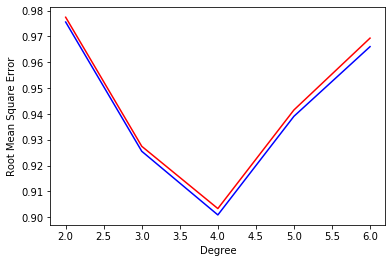

In [92]:
plt.plot(degree,RMSE_train,'r')
plt.plot(degree,RMSE_test,'b')
plt.xlabel("Degree")
plt.ylabel("Root Mean Square Error")
plt.show()
